In [1]:
library(Seurat)
library(SeuratWrappers)
library(Matrix)
library(glmGamPoi)
library(sctransform)

Attaching SeuratObject



In [2]:
exp_data <- readMM('../../data/macparland/matrix.mtx')
exp_data_meta <- read.csv('../../data/macparland/meta.csv', row.names=1)
colnames(exp_data) <- rownames(exp_data_meta)
rownames(exp_data) <- read.csv('../../data/macparland/features.tsv')$x
size_factor <- exp_data_meta$nCount_RNA/mean(exp_data_meta$nCount_RNA)
pbmc <- CreateSeuratObject(exp_data)
pbmc <- NormalizeData(pbmc)
pbmc <- FindVariableFeatures(pbmc, selection.method='vst', nfeatures=2000)
pbmc <- ScaleData(pbmc, features = rownames(pbmc))

Centering and scaling data matrix



# PCA

In [3]:
pbmc_pca <- RunPCA(pbmc)

PC_ 1 
Positive:  HP, RBP4, FGA, AMBP, ORM1, CYP2E1, AZGP1, SERPINA1, HPX, APOH 
	   FGB, APCS, MGST1, ORM2, APOA1, VTN, FGL1, FGG, MT1G, TTR 
	   RARRES2, MT1X, ANG, APOE, SAA1, GC, FABP1, AGT, SAA4, C3 
Negative:  TMSB10, HLA-E, IGFBP7, ID3, GNG11, LIFR, TIMP1, HSPG2, PTPRB, IFI27 
	   ENG, RAMP3, DNASE1L3, TM4SF1, SDPR, PRSS23, CCL14, IL33, NPDC1, RNASE1 
	   PCAT19, VIM, EGFL7, ID1, TSPAN7, MRC1, C7, FCN3, SRPX, CLDN5 
PC_ 2 
Positive:  TFPI, TIMP3, ID1, CALD1, PLPP3, IL6ST, GPX3, TM4SF1, RBP4, TGM2 
	   HSPG2, CYB5A, APP, PTPRB, AMBP, LIFR, RARRES2, ADIRF, FGA, HP 
	   NR2F2, FGB, APOH, APCS, SLC9A3R2, VTN, AZGP1, CYP2E1, TTR, HPX 
Negative:  TYROBP, CORO1A, S100A4, CYBA, FCER1G, CTSS, TMSB10, EVI2B, HCLS1, RAC2 
	   AIF1, LST1, UCP2, CD37, NKG7, C1orf162, CCL4, CD74, CD163, LSP1 
	   HLA-DRA, FCGR3A, HLA-DPB1, CCL3, GZMA, CCL5, HLA-DPA1, RNASE6, PYCARD, CD52 
PC_ 3 
Positive:  GZMA, CCL5, NKG7, ISG20, CD7, KLRB1, KLRD1, RAC2, PRF1, CTSW 
	   CD247, CD69, TRBC2, FKBP11, CMC1, IFIT

In [4]:
write.csv(Embeddings(pbmc_pca), 'pca.csv')

# SCTransform

In [5]:
pbmc_sct <- SCTransform(pbmc, batch_var='orig.ident', method='glmGamPoi')

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 18715 by 8444

Model formula is y ~ (log_umi) : orig.ident + orig.ident + 0

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 232 outliers - those will be ignored in fitting/regularization step


Some genes not detected in batch P1TLH -- assuming a low mean.

Some genes not detected in batch P2TLH -- assuming a low mean.

Some genes not detected in batch P3TLH -- assuming a low mean.

Some genes not detected in batch P4TLH -- assuming a low mean.

Some genes not detected in batch P5TLH -- assuming a low mean.

Second step: Get residuals using fitted parameters for 18715 genes



  |======================================================================| 100%


Computing corrected count matrix for 18715 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.634461 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



In [6]:
pbmc_sct <- RunPCA(pbmc_sct)
write.csv(Embeddings(pbmc_sct), 'sct.csv')

PC_ 1 
Positive:  SAA2, SAA1, ORM1, HP, APOC3, APOA2, SERPINA1, FGB, FGA, ALB 
	   APOC1, APOA1, ORM2, AMBP, FGG, RBP4, FGL1, MT1G, APOE, HPX 
	   CRP, VTN, APOH, TF, C3, MT1X, TTR, MT2A, FABP1, APOB 
Negative:  C1QA, TMSB10, C1QB, TMSB4X, HLA-DRA, CD74, MALAT1, TYROBP, VIM, S100A6 
	   CD163, AIF1, C1QC, S100A9, LYZ, MS4A6A, FCER1G, CTSS, HLA-DPB1, HLA-DRB1 
	   FTL, TIMP1, HLA-DPA1, IGFBP7, S100A11, FTH1, RNASE1, SAT1, SRGN, CTSB 
PC_ 2 
Positive:  IGFBP7, ID1, DNASE1L3, ID3, FCN3, LIFR, TM4SF1, PRSS23, GNG11, RAMP3 
	   ADIRF, TIMP1, MGP, C7, TIMP3, HSPG2, CCL14, IFI27, ENG, PTPRB 
	   VWF, INMT, SPARCL1, PCAT19, SRPX, SDPR, FCN2, CRHBP, CLDN5, CTGF 
Negative:  C1QA, C1QB, FTL, HLA-DRA, C1QC, CD163, TYROBP, AIF1, CD74, S100A9 
	   CST3, CTSS, LYZ, FCER1G, SAT1, MS4A7, HLA-DPB1, CTSB, GPX1, HLA-DPA1 
	   LST1, MARCO, FTH1, MS4A6A, S100A8, HMOX1, VSIG4, FCGR3A, HLA-DRB1, CD5L 
PC_ 3 
Positive:  TIMP1, IGFBP7, ID1, DNASE1L3, FTL, ID3, C1QA, C1QB, RNASE1, FCN3 
	   LIFR, PRSS23, TM4SF1,

# GLM-PCA

In [7]:
pbmc_gpca <- RunGLMPCA(pbmc, L=20, 
                       X=as.matrix(model.matrix(as.formula('~factor(orig.ident)'), pbmc@meta.data)), 
                       sz=size_factor)

Sparse matrices are not supported for minibatch='none'. Coercing to dense matrix. If this exhausts memory, consider setting minibatch to 'stochastic' or 'memoized'.



In [8]:
write.csv(Embeddings(pbmc_gpca, reduction='glmpca'), 'glmpca.csv')

# ARI & Silhouette

In [9]:
library(mclust)
library(cluster)

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.



In [10]:
pca <- read.csv('pca.csv', row.names=1)
sct <- read.csv('sct.csv', row.names=1)
glmpca <- read.csv('glmpca.csv', row.names=1)
rdpca <- read.csv('rdpca.csv', header=FALSE)
rownames(rdpca) <- rownames(pca)

pbmc[['pca']] <- CreateDimReducObject(embeddings = as.matrix(pca), key = "pc_", assay='RNA')
pbmc[['sct']] <- CreateDimReducObject(embeddings = as.matrix(sct), key = "sct_", assay='RNA')
pbmc[['glmpca']] <- CreateDimReducObject(embeddings = as.matrix(glmpca), key = "glmpc_", assay='RNA')
pbmc[['rdpca']] <- CreateDimReducObject(embeddings = as.matrix(rdpca), key = "rdpc_", assay='RNA')

In [11]:
celltype <- exp_data_meta$celltype
intname <- 1:length(unique(celltype))
names(intname) <- unique(celltype)
for (method in c('pca', 'sct', 'glmpca', 'rdpca')){
    obj <- FindNeighbors(pbmc, reduction=method, dims=1:20, verbose=FALSE)
    obj <- FindClusters(obj, resolution=1, verbose=FALSE)
    
    print(method)
    print(length(unique(obj$seurat_clusters)))
    print(adjustedRandIndex(obj$seurat_clusters, celltype))
}

for (method in c('pca', 'sct', 'glmpca', 'rdpca')){
    obj <- RunTSNE(pbmc, reduction=method, perplexity=70, dims=1:20)
    dist_mat <- dist(Embeddings(obj, reduction='tsne'))
    silscore <- silhouette(as.vector(intname[celltype]), dist_mat) 
    
    print(method)
    print(summary(silscore)$avg.width)

}

[1] "pca"
[1] 24
[1] 0.3584187
[1] "sct"
[1] 26
[1] 0.3000384
[1] "glmpca"
[1] 33
[1] 0.06403998
[1] "rdpca"
[1] 30
[1] 0.3670173
[1] "pca"
[1] 0.2452769
[1] "sct"
[1] 0.206576
[1] "glmpca"
[1] -0.1520101
[1] "rdpca"
[1] 0.3503726


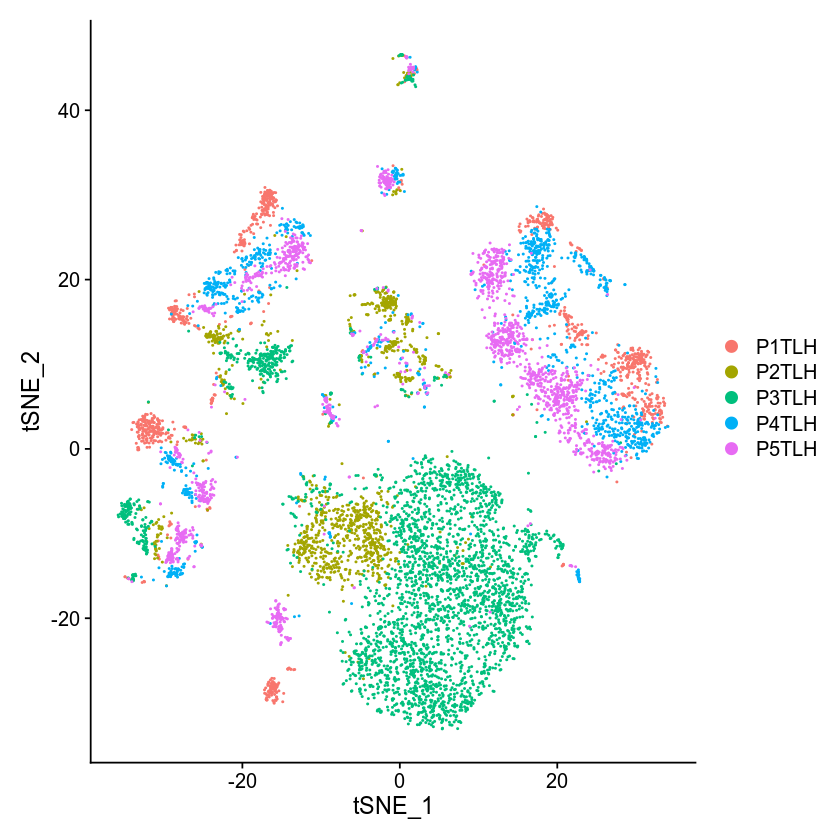

In [38]:
obj <- RunTSNE(pbmc, reduction='rdpca', perplexity=70, dims=1:20)
DimPlot(obj)